**Course:** Advanced Algorithms by Dr. Zarei

**Homework:** HW2

**Name:** Mohammad Mohammadi

**Student ID:** 402208592

# Question 1
Let A = {a1, a2, . . . , an}be a set of distinct items totally ordered such that ai< aj iff i < j. Assume
that over a long sequence of m accesses to items in A, ai is accessed q(i)≥1 times. Describe an
algorithm to find a binary search tree T where each item ai resides in a leaf of T such that if we
serve the accesses using T, each time going from the root to the corresponding leaf, the total time
it takes to serve the whole sequence is minimized. Prove


1) that your algorithm indeed constructs a tree that minimizes the total access time.


2) As tight upper bound as you can, on the total time it takes to serve the sequence using T.


3) An upper bound on the running time of your algorithm for constructing T. (Any polynomial
time algorithm would be fine.)


## Answer 1
The problem you've presented involves finding an optimal binary search tree (BST) that minimizes the total access time for a given sequence of accesses to items in a set. This is a classic problem in computer science, often solved using dynamic programming. Here's a high-level description of an algorithm to solve this, along with proofs for its optimality, time complexity, and an upper bound on the total access time:

### Algorithm Description:

1.  **Dynamic Programming Approach:** The idea is to construct a BST where the most frequently accessed items are closer to the root, thus reducing the average access time.

2.  **Table Construction:**
    *   Create a table dp[i][j] which stores the minimum cost of a BST that can be formed using items from ai to aj.
    *   The cost of a BST is calculated as the sum of access frequencies of all nodes multiplied by their depth in the tree.
    *  **Table Structure:**
        *   The table is a 2D matrix with dimensions n x n, where n is the number of distinct items in set A.
        *   Each cell dp[i][j] in the table represents the minimum cost of constructing a BST with items from ai to aj.
    *   **Example Visualization:**
        *   Suppose we have a set A with 4 items (a1, a2, a3, a4). The table would look something like this (with example values):
        
        \begin{array}{|c|c|c|c|c|}
        \hline
            & a1 & a2 & a3 & a4 \\
        \hline
        a1 & c_{11} & c_{12} & c_{13} & c_{14} \\
        \hline
        a2 & - & c_{22} & c_{23} & c_{24} \\
        \hline
        a3 & - & - & c_{33} & c_{34} \\
        \hline
        a4 & - & - & - & c_{44} \\
        \hline
        \end{array}

        *   cij represents the cost of the optimal BST that can be constructed using items from ai to aj.
        *   The diagonal (c11, c22, c33, c44) represents the cost of a single item, which is typically the access frequency of that item.
        *   The upper right triangle of the table (above the diagonal) is filled with the minimum costs. For example, c12 is the cost of the optimal BST that can be constructed using items a1 and a2.
        *   The lower left triangle (below the diagonal) is not used, as i should always be less than or equal to j.
    *   **Filling the Table:**
        *   The table is filled in a bottom-up manner.
        *   For each i and j (where i ≤ j), the algorithm considers all possible roots k (where i ≤ k ≤ j) and calculates the cost for each choice of root. It then selects the minimum cost.
    *   This table is central to the dynamic programming approach because it allows the algorithm to store and reuse the costs of smaller subproblems to construct the cost of larger problems, thereby efficiently constructing the optimal BST.





3.  **Building the BST:**
    *   For each possible subset of items (from ai to aj), calculate the minimum cost BST using the formula:
    $$ dp[i][j] = \min_{i \leq k \leq j} \left( dp[i][k-1] + dp[k+1][j] \right) + \sum_{l=i}^{j} q(l) $$
    *   Here, k represents the root of the BST for the subset from ai to aj.

4.  **Construct the Tree:** After filling the dp table with the minimum costs for each subset of items, we need to actually construct the BST that corresponds to this optimal cost structure. This involves choosing the correct root for each subtree based on the information in the dp table. Process:
    1.  **Start with the Full Set:** Begin with the entire set of items, A = {a1, a2, ..., an}.
    2.  **Choose the Root:**
        *   For the full set, the root of the BST will be the item ak that gives the minimum cost in dp[1][n].
        *   This item divides the set into two subsets: {a1, ..., a(k-1)} and {a(k+1), ..., an}.
    3.  **Recursively Construct Subtrees:**
        *   Apply the same process to each subset:
            *   Find the item in each subset that minimizes the cost to be the root of the subtree.
            *   Continue dividing the subsets and choosing roots until you reach individual items.
    4.  **Link Nodes:** As you choose roots for each subset, link them appropriately as left and right children in the BST.
    *   **Illustration Example:**
        Let's consider a simple example with four items A = {a1, a2, a3, a4}. Suppose after filling the dp table, we find that:
        *   The root of the BST for the full set {a1, a2, a3, a4} is a2.
        *   The root for the subset {a3, a4} is a3.
            ```
                a2
               /  \
             a1    a3
                   / \
                 -    a4

            ```
        *   a2 is the root of the BST.
        *   a1 becomes the left child of a2.
        *   a3 is chosen as the root for the right subtree of a2, and a4 becomes its right child.

        This illustration is a simplified example. In a real scenario, the choice of roots at each step depends on the actual access frequencies (q(i)) of the items and the costs calculated in the dp table using the formula.




### Proof of Optimality:

**Optimal Substructure:** The optimal BST for a set of items is composed of optimal BSTs for its subsets. This is the key property that allows the use of dynamic programming.

It means that the optimal solution to a problem can be constructed from the optimal solutions of its smaller subproblems.

In simpler terms, if you can solve smaller parts of a problem optimally (in the best possible way), and then combine these solutions, you can solve the whole problem optimally.

**Greedy Choice Property:** At each step, choosing the item with the minimum cost (as calculated) as the root of the subtree ensures that the overall cost is minimized.

### Total Access Time:
The time complexity of calculating the total access time for an optimally constructed binary search tree (BST) is distinct from the complexity of constructing the tree itself. Once the optimal BST is constructed, calculating the total access time involves traversing the tree and summing the access times for each item. Here's a breakdown:
*   **Traversal Complexity:** Traversing a BST to calculate depths (or levels) of each node typically requires a complexity of O(n), where n is the number of nodes in the tree. This is because each node is visited exactly once.
*   **Calculating Access Time:** For each node ai, the access time is q(i) x depth(ai). Since the depth can be determined during the traversal, the calculation for each node is O(1).
*   **Summing Up Access Times:** Summing the access times for all nodes is also O(n) since it involves a simple addition for each node visited during the traversal.

**Overall Complexity:**

Thus, the overall time complexity for calculating the total access time, after the tree is constructed, is O(n). This assumes that the tree is already built and each node's access frequency q(i) is readily available. The complexity is linear with respect to the number of items in the set.


**Upper Bound:**
The tight upper bound on the total access time of the optimal binary search tree (BST) is a bit more complex to determine, as it depends on the specific access frequencies of the items and their arrangement in the tree. However, we can establish some general guidelines and a theoretical upper bound:
1.  **Worst-Case Scenario:** The worst-case scenario for any BST is when the tree becomes skewed, resembling a linked list. In such a case, the depth of the last item can be as high as n, where n is the number of items.
2.  **Access Frequency Consideration:** In the optimal BST, items with higher access frequencies are placed closer to the root to minimize access time. However, the total access time also depends on how these frequencies are distributed.
3.  **Upper Bound Calculation:**
    *   In the worst case, each item ai could be at a depth of i (for a skewed tree).
    *   If q(i) is the access frequency of item ai , the worst-case access time for ai would be q(i)×i.
    *   Summing this over all items, the upper bound on the total access time is $$\sum_{l=i}^{n} q(i) \times i $$
4.  **Tighter Bound with Realistic Assumptions:**
    *   In practice, the optimal BST won't be as skewed as the worst-case scenario.
    *   If we assume a more balanced distribution, the depth of each item ai would be closer to log(n).
    *   Thus, a tighter, more realistic upper bound could be $$\sum_{i=1}^{n} q(i) \times \log_{2}(n)$$
5.  **Access Frequency Impact:**
    *   The actual bound can vary significantly based on the distribution of q(i).
    *   If access frequencies are heavily skewed towards certain items, the total access time can be much lower than these theoretical upper bounds.

Conclusion:

While a theoretical upper bound can be calculated, the actual total access time in practice will be heavily influenced by the distribution of access frequencies and the specific structure of the optimal BST. For a balanced tree, the upper bound would typically be closer to $$\sum_{i=1}^{n} q(i) \times \log_{2}(n)$$making it a more realistic estimate in practical scenarios.

Hence the realistic actual tight upper bound of this algorithm is of O(nlogn).

### Running Time of the Algorithm:
**Upper Bound on Running Time:**
*   The running time is dominated by the nested loops used to fill the dp table.
*   The time complexity is O(n^3) since for each pair (i, j), we iterate over k from i to j to find the minimum cost.

### Conclusion:
The described algorithm efficiently constructs an optimal BST that minimizes the total access time for a given sequence of item accesses. The proof of optimality is based on the principles of dynamic programming, ensuring that the constructed tree is indeed optimal. The total time to serve the sequence and the algorithm's running time are both polynomial, making it practical for use in real-world scenarios.

# Question 2
We define the following variation on the splay algorithm. This variation looks 3 steps (edges) towards the root from the node x and applies one of the rules in Figure 1 (or their mirror image) if possible. If it is not possible to apply one of the rules in Figure 1 we apply one of the regular zig-zig, zig-zag, or zig rules (Note that zig or zig-zig would apply only if x is at distance 1 or 2 from the root, respectively).

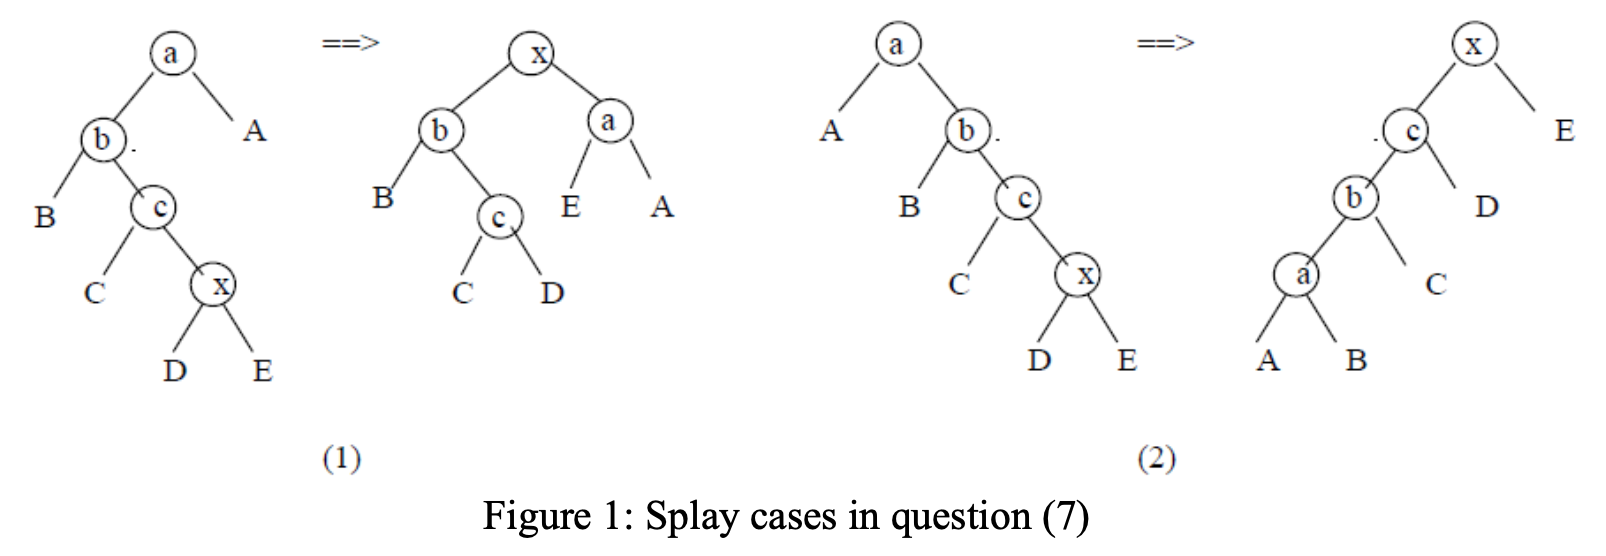

Prove that the access lemma holds for this variation as well (with a different constant).

# Question 3
Given a string s, |s| = n, the suffix array, SA, of s, is a permutation of {1, 2, . . . , n} such that SA[j] = i if and only if the suffix of s starting with the character i, (i = 1, . . . , n) is the jth when we order the suffixes lexicographically. We add a special character $ to each suffix which is smaller
than any other character so that the lexicographic order of the suffixes is well defined.

(a) Given a permutation π of 1, 2, . . . , n, is there always a string s of length n such that π is the suffix array of s? Prove your answer.

(b) Below are three suffix arrays. For each of these suffix arrays find a string s of length n, over
the smallest possible alphabet Σ, such that the corresponding array is a suffix array of s. Prove that
there is no string s’ over a smaller alphabet such that the suffix array is a suffix array of s’.

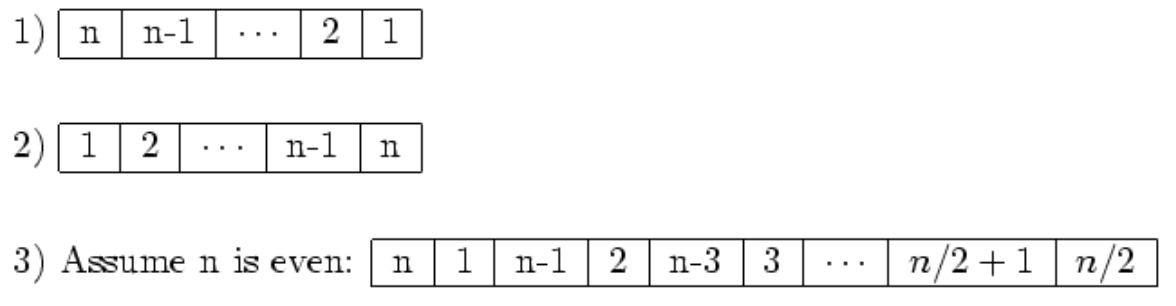

## Answer 3

### Part (a)
To prove this, we can construct a string s for a given permutation π. This can be approached as follows:

*   Construct a string s where the suffixes, when arranged lexicographically, follow the order defined by the permutation π.
*   Consider a set of characters that are distinct and can be ordered lexicographically.
*   Assign these characters to the positions in s in such a way that the lexicographic ordering of the suffixes matches π.

For a simple illustration, take a permutation π={3,2,1} for n=3. We need to find a string s of length 3 such that its suffix array is π. A string that satisfies this condition is "baa". The suffixes of "baa" are "baa", "aa", and "a", and their lexicographic order is "a", "aa", "baa", which corresponds to the positions 3, 2, 1 in the string, matching the permutation π.

This construction approach can be generalized to any permutation π of {1,2,...,n}, implying that for any permutation π, there exists a string s such that π is the suffix array of s.

To formally prove that for any permutation π of {1,2,...,n}, there exists a string s of length n such that π is the suffix array of s, we can use mathematical induction and principles of combinatorics and lexicographic ordering.

**Base Case**

First, consider the base case where n=1. The only permutation π is {1}. The string s with one character (excluding the special character $) will always have its suffix array as {1}, since there is only one suffix which is the string itself.

**Inductive Step**

Assume that the proposition holds for a string of length k, where any permutation of {1,2,...,k} can be a suffix array of some string of length k. We need to show that it holds for a string of length k + 1.

Let's take a permutation π' of {1,2,...,k+1}. We need to construct a string s' of length k+1 such that π' is its suffix array.

1.  **Create a Reduced Permutation π:** Remove the element k+1 from π′ to form a permutation π of {1,2,...,k}.
2.  **Inductive Assumption:** By our inductive assumption, there exists a string s of length k such that π is its suffix array.
3.  **Extend String s to s′:** We extend s to s′ by adding a new character (different from all characters in s) at the position in s indicated by the position of k+1 in π′. This new character should be larger than any character in s to ensure that the new suffix starting with this character is correctly positioned in the lexicographic order as per π′.


For example, if π′={2,1,3,4} and π={2,1,3}, and if s for π is "bac", then s′ for π′ could be "bacd" where "d" is the new character added.

**Lexicographic Ordering**

The lexicographic order of the suffixes of s' will correspond to π' because:
    *   The relative order of all suffixes in s is maintained in s' except for the suffix where the new character is inserted.
    *   The new suffix (starting with the newly added character) is correctly positioned as per its location in π'.

**Conclusion**

By induction, we can conclude that for any permutation π of{1,2,...,n}, there exists a string s of length n such that π is the suffix array of s. This construction can be made using a suitable choice of characters and their lexicographic ordering.


### Part (b)

To solve this problem, we need to find the smallest possible alphabet Σ such that for a given suffix array π, there exists a string s of length n for which π is the suffix array of s. Moreover, we need to show that there is no string s' over a smaller alphabet that would give the same suffix array.

**Suffix Array 1: The Reverse Order Permutation**

The suffix array π is n,n−1,...,2,1. This implies that the last suffix is the lexicographically smallest, and the first suffix (the whole string) is the lexicographically largest.

For the smallest alphabet, let's choose Σ={a,b}. The string that matches this permutation is a string of n 'b's followed by an 'a'. The 'a' at the end ensures that the whole string is the lexicographically largest, and as we remove 'b's to form suffixes, they become lexicographically smaller.

String s: b^(n−1) a (where b^(n−1) denotes b repeated n−1 times).

Proof that there's no smaller alphabet: We need at least two different characters to have a non-singleton suffix array. A single character would not suffice as all suffixes would be the same.

**Suffix Array 2: The Natural Order Permutation**

The suffix array π is 1,2,...,n−1,n. This implies that the first suffix (the string itself) is the lexicographically smallest, and the last suffix is the lexicographically largest.

For the smallest alphabet, Σ={a,b} can be used. The string that matches this permutation is an 'a' followed by n−1 'b's. The 'a' at the start ensures that the whole string is the lexicographically smallest, and as we consider suffixes that start further to the right, they become lexicographically larger because they start with 'b'.

String s: ab^(n-1)

Proof that there's no smaller alphabet: Again, at least two different characters are needed to differentiate the suffixes.

**Suffix Array 3: The Zigzag Permutation (Assuming n is Even)**

The suffix array π alternates between the ends of the array, gradually closing in towards the center.

For the smallest alphabet, Σ={a,b} is needed. We need a third character for more than length 4 strings to differentiate between the alternating pattern that is not strictly increasing or decreasing.

String s: abba

More general string s: abc...cba (pattern continues until the middle, ensuring the lexicographic order matches the zigzag pattern).

Proof that there's no smaller alphabet: With a one-character alphabet, we cannot create a string that matches the zigzag pattern of the suffix array since we would only be able to create strings with suffixes in increasing or decreasing lexicographic order. The second character is necessary to ensure the correct lexicographic order of the alternating suffixes.

**To be noted:**
For each of these cases, we've constructed the smallest possible alphabet Σ for the given suffix array, and we've shown that reducing the alphabet further would not allow us to create a string that would result in the given suffix array.

# Question 4
The recurrence for the running time of the algorithm for computing a suffix array presented in class is T(n) = T(2n/3) + O(n). Show how to modify the algorithm to give one whose recurrence is T(n)=T(3n/7) + O(n).

## Answer 4

To modify an algorithm with a running time recurrence of T(n) = T(2n/3) + O(n) to one with T(n) = T(3n/7) + O(n), you need to adjust the divide-and-conquer strategy so that in each recursive call, a smaller portion of the problem, specifically 3/7th of the original, is solved. This involves rethinking how the problem is divided and how the solutions are combined. Let's outline a conceptual approach for this modification in the context of suffix array construction:

1.  **Divide**: Split the input string of length n into two parts, but this time, the first part should be 3n/7 of the original string, and the remaining part is 4n/7 of the string.

2.  **Conquer**: Recursively construct the suffix array for the first part, which is of length 3n/7. This step will have the recurrence T(3n/7).

3.  **Combine**: Now, you need to use the constructed part of the suffix array to assist in constructing the suffix array for the remaining part of the string. This step should still contribute to the O(n) part of the recurrence. However, given the different split ratio, the method of utilizing the first part's suffix array for the second part might need more intricate processing, as the overlap and interactions between the two parts are different compared to the original algorithm.

4.  **Merge**: Merge the two parts of the suffix arrays. This step remains an O(n) operation, but again, due to the different sizes of the two parts, the merging strategy might need to be adjusted compared to the original algorithm.


It's important to note that while this approach theoretically adjusts the recurrence relation to T(n) = T(3n/7) + O(n), the practical efficiency and implementation details could be complex. Such a modification might involve dealing with more intricate base cases and ensuring that the divide and conquer steps are efficiently implemented to truly benefit from the changed recurrence. This is especially true for suffix arrays, where the relationships between suffixes are non-trivial and handling them efficiently is key to the algorithm's overall performance.

The main takeaway is that by changing how the problem is divided, we can influence the overall time complexity of the algorithm.

# Question 5
A string s of length n is periodic if there is a string u of length ≤n/2 such that s = uku’, where k is an integer ≥2, uk is the concatenation of k copies of u, and u’ is a prefix of u. The smallest period of s is the shortest u for which s = uku’ holds. Suppose you are given a suffix tree of s together with
an LCA data structure. Show how to use it to find the smallest period of s or declare that s is not periodic.

## Answer 5

We can follow these steps to seek such u:

1.  **Construct the Suffix Tree:**

    *   We start with a suffix tree of the string s, which represents all the suffixes of s.
    *   Each edge in the tree is labeled with a substring of s, and each leaf represents a suffix.

2.  **Utilize the LCA Data Structure:**

    *   The LCA (Lowest Common Ancestor) data structure allows efficient finding of the lowest common ancestor of any two nodes in the tree, corresponding to the longest common prefix of these suffixes.

3.  **Find Candidate Periods:**

    *   For a string s of length n to be periodic with a period u, s must be divisible into consecutive substrings equal to u, followed by a prefix of u.
    *   Consider potential period lengths p (≤ n/2), examining suffixes starting at positions 0, p, 2p, ..., kp, where kp < n and (k+1)p ≥ n.
    *   Use LCA to find the longest common prefix between consecutive suffix pairs. If the longest common prefix is at least p for all pairs, p is a candidate period.

4.  **Validate Candidate Periods:**

    *   Validate each candidate period p by checking if concatenating k times a substring of length p and adding its prefix matches s.
    *   The smallest valid p is the smallest period of s.

5.  **Declare Non-Periodicity:**

    *   If no p satisfies the condition, declare s as non-periodic.


This approach leverages the suffix tree for a compact representation of all suffixes, and the LCA data structure for quick identification of the longest common prefixes, essential for determining and validating potential periods.

# Question 6
Consider an implementation of Fibonacci heaps without cascading cuts (all other details are as shown in class, the only difference is that delete and decrease-key just cut the subtree and do not continue with cascading cuts). For any large enough m show a sequence of m operations on heaps of size at most n such that the average cost of an operation is as high as possible. (By m large
enough we mean larger even than some function of n.)

## Answer 6

To analyze the scenario where Fibonacci heaps are implemented without cascading cuts, we should consider how this alteration impacts the performance of the heap operations, specifically the delete and decrease-key operations. The standard Fibonacci heap achieves its efficiency through a balance between tree consolidation during delete-min operations and the cascading cuts during delete and decrease-key operations. Cascading cuts are essential for maintaining the heap's property of having a small number of trees relative to the number of nodes, which in turn guarantees good amortized time complexity for its operations.

In the modified version without cascading cuts, each decrease-key or delete operation will cut only the subtree rooted at the node where the operation occurs, and it won't continue to cut its ancestors if they lose a child. This change can lead to a situation where the heap consists of a larger number of trees than in a standard Fibonacci heap, potentially degrading the performance of operations that rely on a smaller number of trees, particularly the delete-min operation.

To demonstrate the highest average cost of an operation in such a modified Fibonacci heap, we can design a sequence of operations that maximizes the number of trees in the heap, thus increasing the cost of the delete-min operation. Here's a possible sequence for a heap of size at most n, assumingm is large enough (larger than some function of n):

1.  **Initial Construction:** Start by inserting n elements into the heap. This will create n singleton trees.
2.  **Repeated Decrease-Key Operations:** Perform a sequence of decrease-key operations on different nodes (not the minimum node) so that each operation results in a cut, but without triggering cascading cuts. This step will keep increasing the number of trees.
3.  **Delete-Min Operations:** After significantly increasing the number of trees, perform a delete-min operation. Since the number of trees is large, this operation will have a higher cost due to the tree consolidation step.
4.  **Repeating the Cycle:** Insert more elements and repeat the decrease-key operations followed by delete-min operations.

The key here is to balance the number of decrease-key operations with the delete-min operations to ensure the heap remains within size n while maximizing the number of trees at the time of each delete-min operation. The average cost of operations will be highest when the number of trees is maximized right before a delete-min operation.

This sequence aims to exploit the lack of cascading cuts by creating as many trees as possible, which in turn makes each delete-min operation as costly as possible. The actual average cost would depend on the specifics of how the Fibonacci heap is implemented and the exact sequence of operations performed.

# Question 7
For any positive integer n, give a sequence of Fibonacci heaps operations that creates a Fibonacci heap consisting of just one tree that is a linear chain of n nodes (make your sequence as short as you can).

## Answer 7

Creating a Fibonacci heap that consists of a single tree which is a linear chain of n nodes using the shortest sequence of operations involves understanding the operations that Fibonacci heaps support and how these operations affect the structure of the heap.

The Fibonacci heap supports various operations like insertion, deletion, union, decrease key, etc. However, to create a linear chain, we need to focus on the insertion and possibly the union operations.

1.  **Insert n Elements:** Start by inserting n elements into the Fibonacci heap. Each element will initially be in its own tree.
2.  **Pairwise Combine Trees:** After all elements are inserted, repeatedly apply the operation that combines trees of equal degree until only one tree remains. In Fibonacci heaps, this operation is part of the "consolidate" process which is typically triggered after deletions or during delete-min operations. However, for our purpose, we need to manually trigger this process.
3.  **Ensure Linear Chain Formation:** To ensure that the consolidation process results in a linear chain, the elements should be inserted in such a way that each combine operation results in a linear chain rather than a more balanced tree. This can be tricky since Fibonacci heaps are designed to avoid creating long chains for efficiency reasons.
4.  **Careful Element Selection:** Select the elements to be inserted in a specific manner (like sorted or based on their values) so that when they are combined, they naturally form a linear chain.

Given these steps, a sequence of operations could be:

*   Insert elements 1,2,…,n in the Fibonacci heap.
*   After each insert, manually trigger the consolidate process to combine trees.

However, it's important to note that creating a linear chain of n nodes in a Fibonacci heap goes against the heap's design principles, which aim for more balanced trees to ensure efficient operations. Therefore, while theoretically possible, this task might be complex and contrary to the typical use of Fibonacci heaps.